In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy import loadtxt 
from matplotlib import cm
from collections import OrderedDict
from astropy.modeling.models import Gaussian1D
from scipy.optimize import leastsq
from pylab import *
from numpy import sqrt, pi, exp, linspace, loadtxt
from scipy.optimize import curve_fit
from pylab import *
from scipy import stats as st
from scipy.stats import chisquare
import sys
import scipy.stats as stats
import math

Fc=2#int(sys.argv[1])
eFc=3 #int(sys.argv[2])




In [2]:
################################################################################
def LC(filename, title, n1, n2, m, C, M, FS, y1, y2, D, Scale):  
	infile1 = loadtxt(filename) #0716 Optical
	F1, eF1, MJD1, eMJD1=([] for _ in range(4))
	for l1 in infile1:
	  FbyErr=float(l1[n1])/float(l1[n2])
	  if ((FbyErr > 2.) & (float(l1[n1])>0)  ):
	   if (n1==2):
	    mjd=(float(l1[0])+float(l1[1]))/2.
	    emjd=(float(l1[1])-float(l1[0]))/2.
	    MJD1.append(mjd)
	    eMJD1.append(emjd)
	    F1.append(float(l1[n1])*Scale)
	    eF1.append(float(l1[n2])*Scale)
	   if (n1!=2):
	    mjd=float(l1[0])
	    emjd=0.
	    MJD1.append(mjd)
	    eMJD1.append(emjd)
	    F1.append(float(l1[n1])*Scale)
	    eF1.append(float(l1[n2])*Scale) 
	print ("# of obs: in "+title, len(MJD1))
	plt.errorbar(x=MJD1, y=F1, yerr=eF1, label=title, color=C, lw=1, linestyle='none', marker=M, fillstyle=FS, markersize=3)
	plt.xticks(fontsize=0, rotation=0)
	#plt.ylim(0,1.1*Ymax)
	plt.xlim(54000, 57560)
	




# of obs: in FACT (E$_\mathrm{th}$~ 0.7 TeV; scaled by 4) 262
# of obs: in MAGIC ($>$ 0.2 TeV) 213
VHE
# of obs: in LAT (0.3-300 GeV) 955
Fermi-Low
# of obs: in BAT (15-50 keV) 358
BAT
# of obs: in X-ray (2-10 keV) 448
# of obs: in X-ray (0.3-2 keV) 374
Xray 2-10 keV
# of obs: in R 5715
R, UV
# of obs: in OVRO (15 GHz) 748
# of obs: in Metsahovi (37 GHz) 625


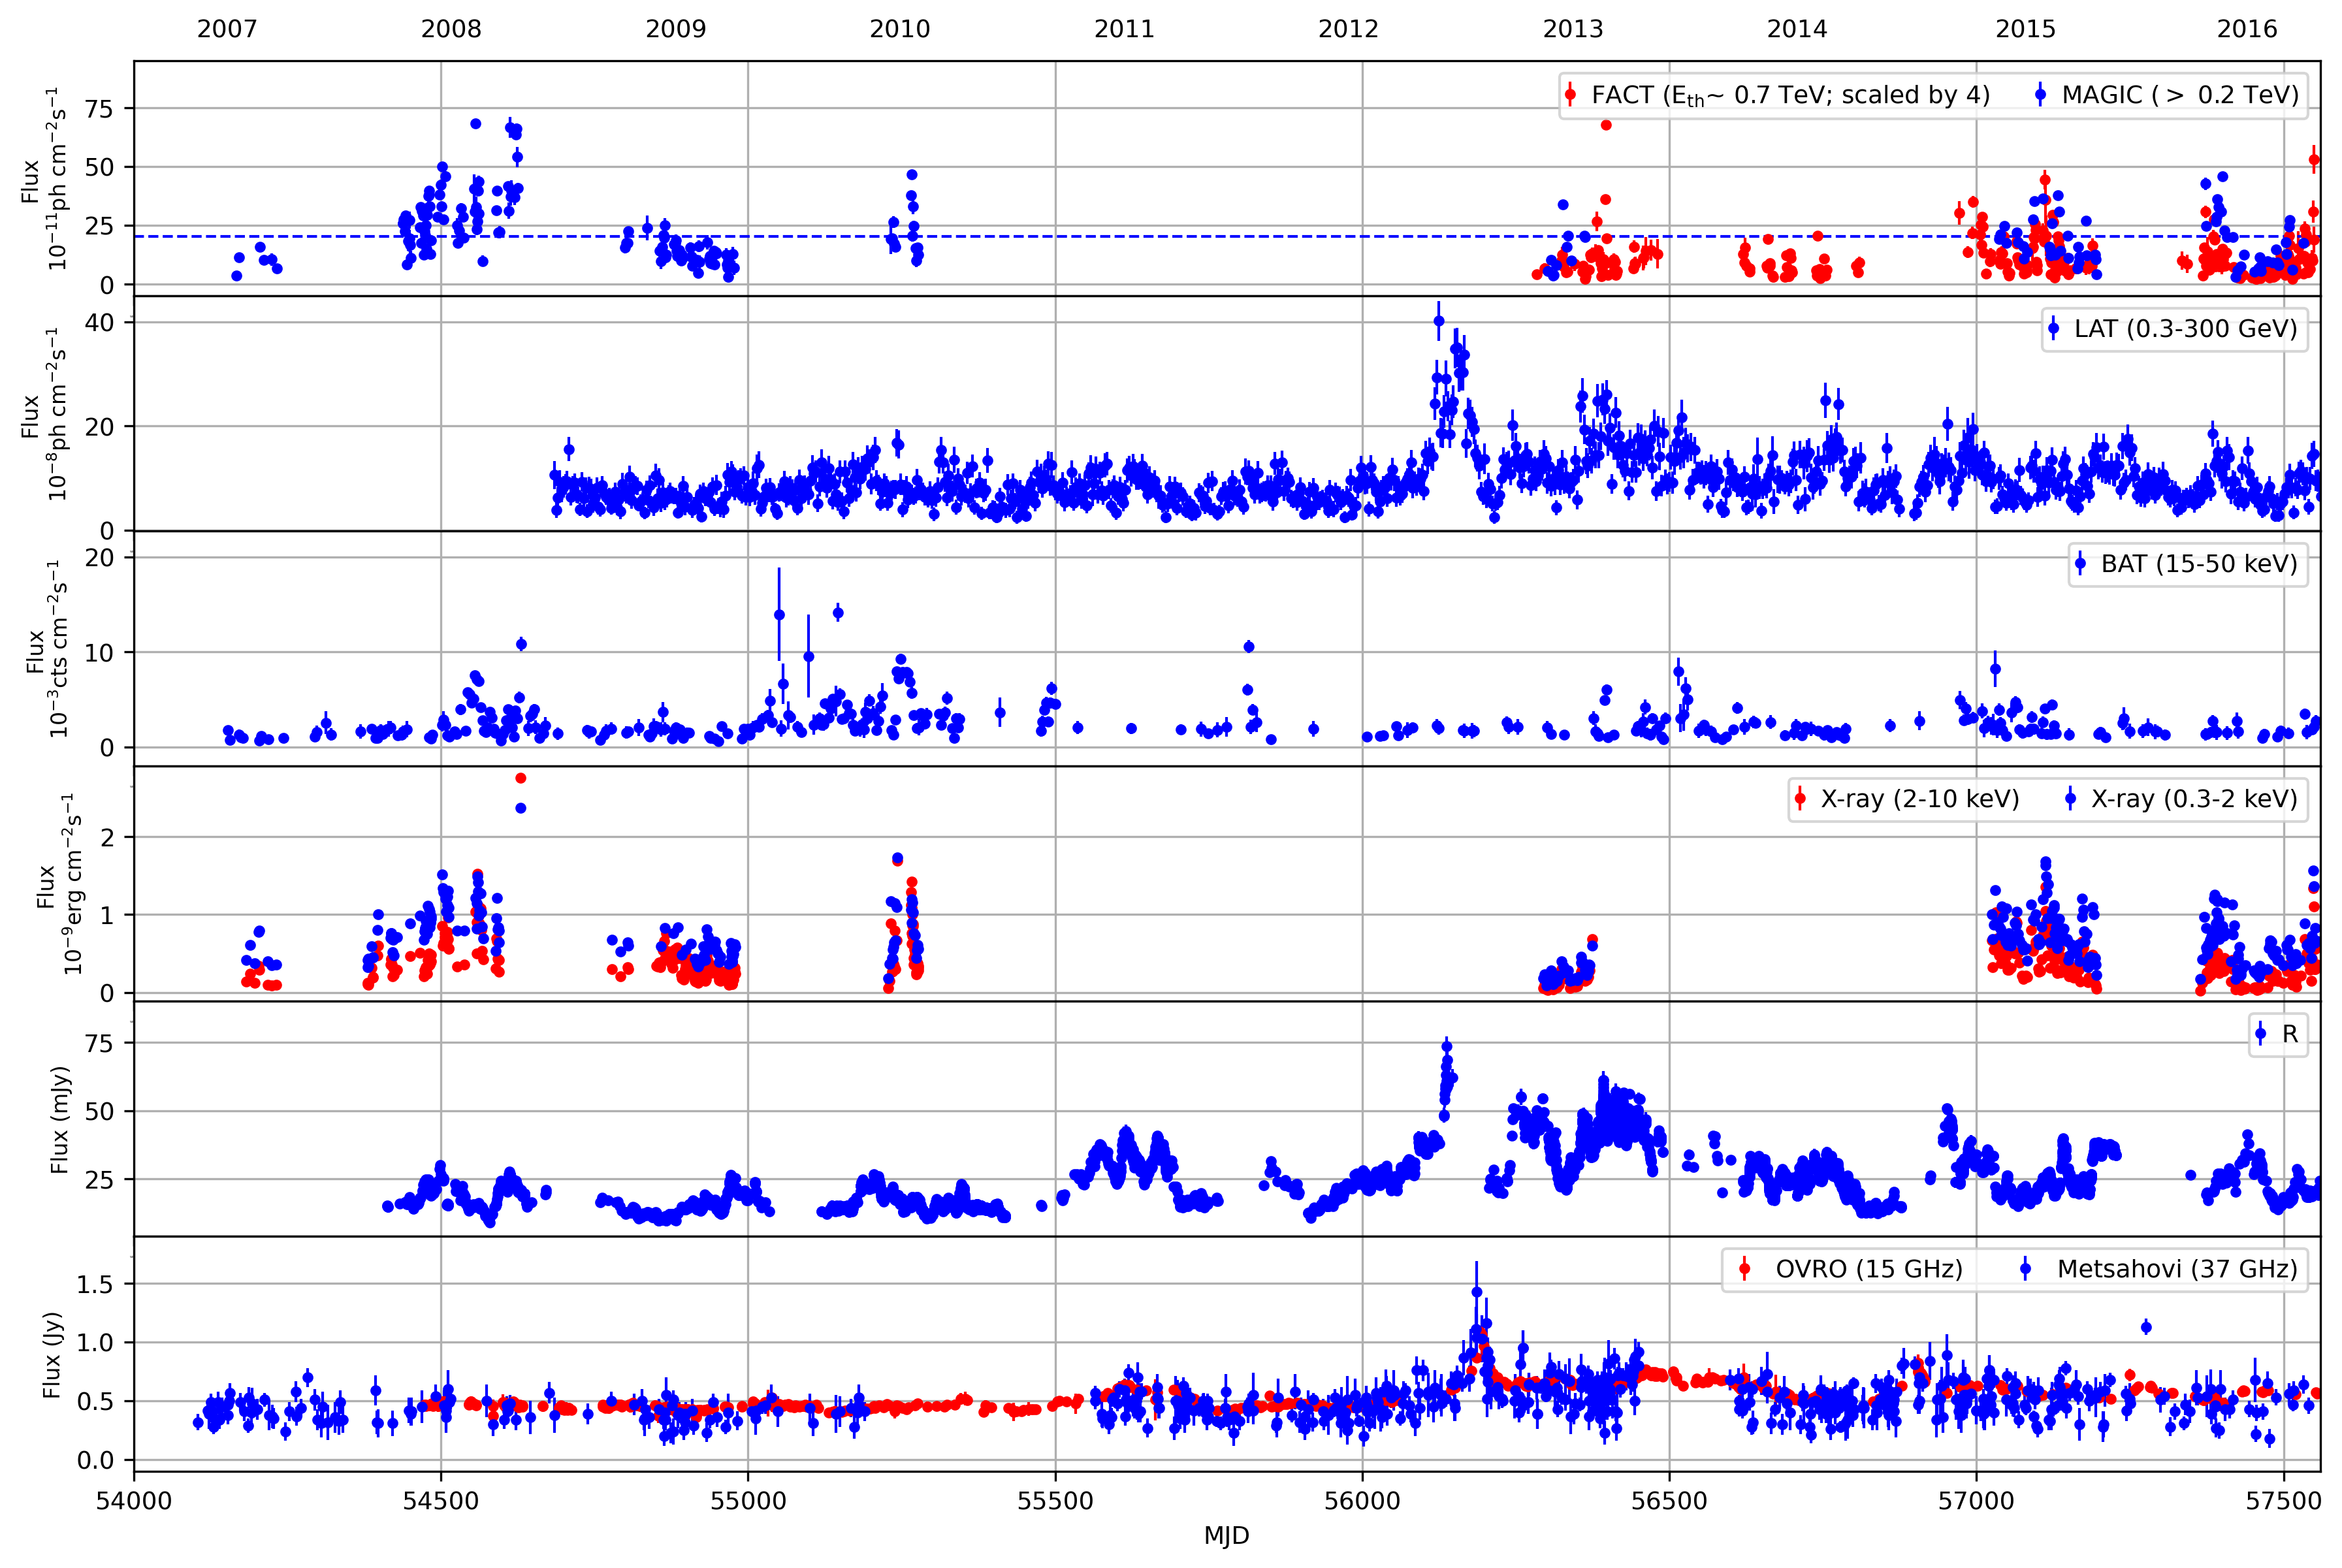

In [4]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=300)
plt.subplots_adjust(wspace=0., hspace=0., top=0.96, right=0.98, left=0.05, bottom=0.06)

plt.subplot(6, 1, 1)
plt.yticks(fontsize=0, rotation=0)

plt.xticks(fontsize=0, rotation=0)
plt.yticks(fontsize=9, rotation=0)
plt.ylabel('Flux\n10$^{-11}$ph cm$^{-2}$s$^{-1}$', multialignment='center', fontsize=8)



LC("FACT_Eth0.7TeV.txt", 'FACT (E$_\mathrm{th}$~ 0.7 TeV; scaled by 4)',Fc, eFc, 200, "red", "o","full", -1.5, 8.5,  'no', 4.)

LC("MAGIC_above0.2TeV.txt", 'MAGIC ($>$ 0.2 TeV)',2, 3, 200, "blue","o","full", -1.5, 8.5,  'yes', 1.e11)

plt.plot([54000,57560], [20.3,20.3], color='blue', ls='--', lw=1.)

plt.grid()
plt.yticks(fontsize=9, rotation=0)
plt.xticks(fontsize=0, rotation=0)
plt.legend(loc='upper right', fontsize=9, ncol=2, handlelength=.1)

plt.text(54101., 105.0, "2007", color='black', fontsize=9,backgroundcolor='1.0', rotation=0)
plt.text(54466., 105.0, "2008", color='black', fontsize=9,backgroundcolor='1.0', rotation=0)
plt.text(54832., 105.0, "2009", color='black', fontsize=9,backgroundcolor='1.0', rotation=0)
plt.text(55197., 105.0, "2010", color='black', fontsize=9,backgroundcolor='1.0', rotation=0)
plt.text(55562., 105.0, "2011", color='black', fontsize=9,backgroundcolor='1.0', rotation=0)
plt.text(55927., 105.0, "2012", color='black', fontsize=9,backgroundcolor='1.0', rotation=0)
plt.text(56293., 105.0, "2013", color='black', fontsize=9,backgroundcolor='1.0', rotation=0)
plt.text(56658., 105.0, "2014", color='black', fontsize=9,backgroundcolor='1.0', rotation=0)
plt.text(57030., 105.0, "2015", color='black', fontsize=9,backgroundcolor='1.0', rotation=0)
plt.text(57390., 105.0, "2016", color='black', fontsize=9,backgroundcolor='1.0', rotation=0)

print ("VHE")

plt.ylim(-5.,95.)

plt.subplot(6, 1,  2)          
LC("LAT_0.3-300GeV.txt", 'LAT (0.3-300 GeV)',Fc, eFc, 200, "blue", "o","full", 0, 7.0,  'yes', 1.)
print ("Fermi-Low")
plt.xticks(fontsize=0, rotation=0)
plt.ylabel('Flux\n10$^{-8}$ph cm$^{-2}$s$^{-1}$', multialignment='center', fontsize=8)

plt.grid()
plt.yticks(fontsize=9, rotation=0)
plt.legend(loc='upper right', fontsize=9, ncol=2, handlelength=.1)
plt.ylim(-.2, 45.0)



plt.subplot(6, 1,  3)          
LC("BAT_15-50keV.txt", 'BAT (15-50 keV)',Fc, eFc, 200, "blue", "o","full", -3.0, 6.7,  'yes', 1.e3)
plt.xticks(fontsize=0, rotation=0)
plt.yticks(fontsize=9, rotation=0)
plt.ylabel('Flux\n10$^{-3}$cts cm$^{-2}$s$^{-1}$', multialignment='center', fontsize=8)

print ("BAT")
plt.grid()
plt.yticks(fontsize=9, rotation=0)
plt.legend(loc='upper right', fontsize=9, ncol=2, handlelength=.1)
plt.ylim(-2.0, 22.7)


plt.subplot(6, 1,  4)          
LC("X-ray_2-10keV.txt", 'X-ray (2-10 keV)',2, 3, 200, "red", "o","full", 0, 1.8,  'yes', 1.e9)
LC("X-ray_0.3-2keV.txt", 'X-ray (0.3-2 keV)',2, 3, 200, "blue", "o","full", 0, 1.8, 'no', 1.e9)
plt.xticks(fontsize=0, rotation=0)
plt.yticks(fontsize=9, rotation=0)
plt.ylabel('Flux\n10$^{-9}$erg cm$^{-2}$s$^{-1}$', multialignment='center', fontsize=8)

plt.legend(loc='upper right', fontsize=9, ncol=4, handlelength=.1)
plt.grid()
print ("Xray 2-10 keV")


plt.subplot(6, 1,  5)          
LC("R.txt", 'R',Fc, eFc,200, "blue", "o","full", 4., 29.,'yes', 1.)
plt.xticks(fontsize=0, rotation=0)
plt.yticks(fontsize=9, rotation=0)
plt.ylabel('Flux (mJy)', multialignment='center', fontsize=8)

plt.grid()
plt.ylim(4.,90.)
plt.legend(loc='upper right', fontsize=9, ncol=4, handlelength=.1)

print ("R, UV")


plt.subplot(6, 1,  6)          
plt.xticks(fontsize=9, rotation=0)
LC("OVRO_15GHz.txt", 'OVRO (15 GHz)',2, 3, 200, "red", "o","full", -0.2, 1.5,  'no', 1.)
LC("Metsahovi_37GHz.txt", 'Metsahovi (37 GHz)',2, 3, 200, "blue", "o","full", -0.2, 1.5,  'yes', 1.)

plt.ylim(-0.1, 1.9)
plt.xticks(fontsize=9, rotation=0)
plt.yticks(fontsize=9, rotation=0)
plt.ylabel('Flux (Jy)', multialignment='center', fontsize=8)

plt.grid()
plt.xlabel(r'MJD', fontsize=9)
plt.legend(loc='upper right', fontsize=9, ncol=5, handlelength=1)
plt.savefig("FigB1.pdf", bbox_inches='tight', dpi=300)
plt.show()
